In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/Machine Learning/IRIS.csv'

In [5]:
df=pd.read_csv(file_path)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
X = df.iloc[:, :-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [8]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)

In [9]:
print("\nCluster Centers:")
print(final_kmeans.cluster_centers_)

print("\nCluster Sizes:")
print(Counter(final_labels))

if 'species' in df.columns:
    comparison_df = pd.DataFrame({'True Label': df['species'], 'Cluster Label': final_labels})
    print("\nMapping of clusters to true species:")
    print(comparison_df.groupby(['True Label', 'Cluster Label']).size())


Cluster Centers:
[[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]

Cluster Sizes:
Counter({np.int32(0): 100, np.int32(1): 50})

Mapping of clusters to true species:
True Label       Cluster Label
Iris-setosa      1                50
Iris-versicolor  0                50
Iris-virginica   0                50
dtype: int64


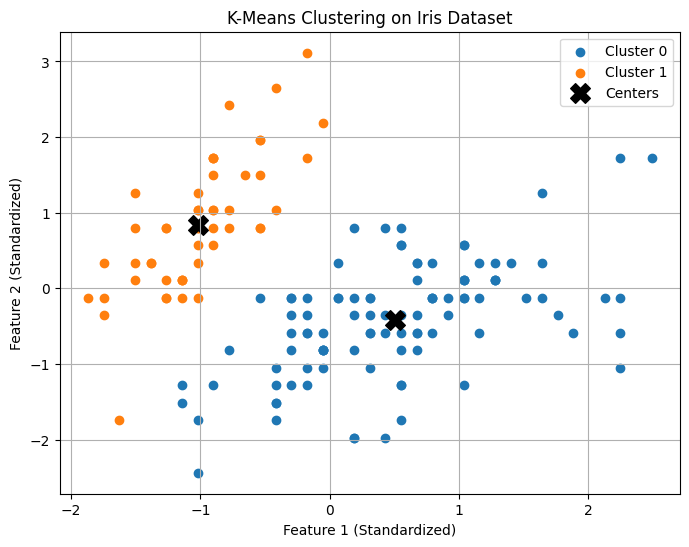

In [10]:
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_scaled[final_labels == i, 0], X_scaled[final_labels == i, 1], label=f'Cluster {i}')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centers')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print("\nFinal Cluster Analysis:")
for i in range(optimal_k):
    count = np.sum(final_labels == i)
    print(f"Cluster {i}: {count} samples")


Final Cluster Analysis:
Cluster 0: 100 samples
Cluster 1: 50 samples
